# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [65]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [66]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [67]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 123)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [71]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

(array([3.07508e+05, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.56500000e+04, 1.17230850e+07, 2.34205200e+07, 3.51179550e+07,
        4.68153900e+07, 5.85128250e+07, 7.02102600e+07, 8.19076950e+07,
        9.36051300e+07, 1.05302565e+08, 1.17000000e+08]),
 <a list of 10 Patch objects>)

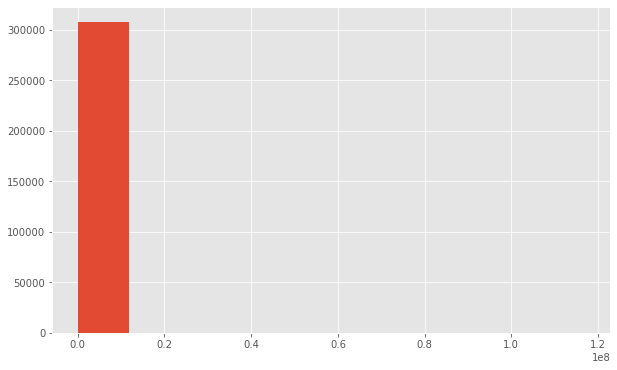

In [72]:
import seaborn as sns
plt.style.use('ggplot') 
plt.figure(figsize=(10, 6))
plt.hist(app_train['AMT_INCOME_TOTAL'])

In [73]:
app_train['AMT_INCOME_TOTAL'].max()

117000000.0

In [75]:
#藉由使用value_counts觀察不同分群的各數，可以發現主要收入集中於0-4034482之間，所以針對這個特徵建議進一步對離群值進行處理.

bin_cut = np.linspace(0, app_train['AMT_INCOME_TOTAL'].max(), 30)
app_train['AMT_INCOME_group'] = pd.cut(app_train['AMT_INCOME_TOTAL'], bins = bin_cut)
app_train['AMT_INCOME_group'].value_counts()

(0.0, 4034482.759]                307502
(4034482.759, 8068965.517]             5
(16137931.034, 20172413.793]           1
(8068965.517, 12103448.276]            1
(12103448.276, 16137931.034]           1
(112965517.241, 117000000.0]           1
(88758620.69, 92793103.448]            0
(40344827.586, 44379310.345]           0
(104896551.724, 108931034.483]         0
(100862068.966, 104896551.724]         0
(96827586.207, 100862068.966]          0
(92793103.448, 96827586.207]           0
(20172413.793, 24206896.552]           0
(24206896.552, 28241379.31]            0
(28241379.31, 32275862.069]            0
(32275862.069, 36310344.828]           0
(36310344.828, 40344827.586]           0
(44379310.345, 48413793.103]           0
(84724137.931, 88758620.69]            0
(48413793.103, 52448275.862]           0
(52448275.862, 56482758.621]           0
(108931034.483, 112965517.241]         0
(60517241.379, 64551724.138]           0
(64551724.138, 68586206.897]           0
(68586206.897, 7

In [82]:
app_train.groupby('AMT_INCOME_group')['AMT_INCOME_TOTAL'].mean()

AMT_INCOME_group
(0.0, 4034482.759]                1.682102e+05
(4034482.759, 8068965.517]        4.950000e+06
(8068965.517, 12103448.276]       9.000000e+06
(12103448.276, 16137931.034]      1.350000e+07
(16137931.034, 20172413.793]      1.800009e+07
(20172413.793, 24206896.552]               NaN
(24206896.552, 28241379.31]                NaN
(28241379.31, 32275862.069]                NaN
(32275862.069, 36310344.828]               NaN
(36310344.828, 40344827.586]               NaN
(40344827.586, 44379310.345]               NaN
(44379310.345, 48413793.103]               NaN
(48413793.103, 52448275.862]               NaN
(52448275.862, 56482758.621]               NaN
(56482758.621, 60517241.379]               NaN
(60517241.379, 64551724.138]               NaN
(64551724.138, 68586206.897]               NaN
(68586206.897, 72620689.655]               NaN
(72620689.655, 76655172.414]               NaN
(76655172.414, 80689655.172]               NaN
(80689655.172, 84724137.931]               

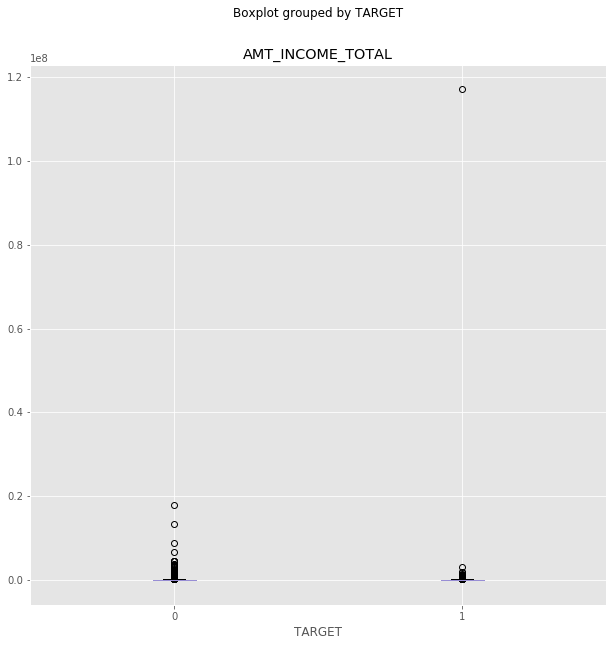

In [83]:
app_train.boxplot(column= 'AMT_INCOME_TOTAL', by = 'TARGET',figsize= (10, 10))